In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
df = pd.read_csv('Data/train.csv', nrows = 20000, parse_dates=["pickup_datetime"])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                20000 non-null  object             
 1   fare_amount        20000 non-null  float64            
 2   pickup_datetime    20000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   20000 non-null  float64            
 4   pickup_latitude    20000 non-null  float64            
 5   dropoff_longitude  20000 non-null  float64            
 6   dropoff_latitude   20000 non-null  float64            
 7   passenger_count    20000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 1.2+ MB


In [11]:
#There are negative fares let us drop
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,11.303321,-72.478584,39.921043,-72.497221,39.913606,1.658000
std,9.541637,10.525376,6.678592,10.460530,6.139231,1.283674
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992150,40.734706,-73.991224,40.734537,1.000000
50%,8.500000,-73.981711,40.752680,-73.980217,40.753583,1.000000
75%,12.500000,-73.966802,40.767443,-73.963729,40.768135,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [ ]:
##########################
#EDA & Feature Engineering
##########################

In [12]:
#Check for missing values and drop (large dataset only a few missing values)
df.isnull().sum(axis=0)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
#Drop fares with values less than 0
df = df[df.fare_amount >= 0]
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000
mean,11.305437,-72.478367,39.920926,-72.497006,39.913488,1.657949
std,9.540788,10.526151,6.679086,10.461300,6.139684,1.283646
min,0.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992148,40.734709,-73.991222,40.734542,1.000000
50%,8.500000,-73.981710,40.752685,-73.980215,40.753587,1.000000
75%,12.500000,-73.966802,40.767445,-73.963732,40.768137,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


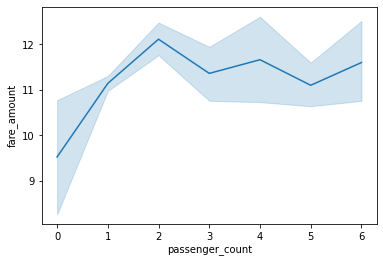

In [14]:
#Check relationship between fares and passenger account, general trend as more passengers increase so does the fare cost
farePassenger = sns.lineplot(x="passenger_count",y="fare_amount",data=df)

In [15]:
#Function to convert latitude longitude to distance in miles for fare
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2): 

    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # radius of earth is 3956 miles
    r = 3956
       
    # calculate the result 
    return(c * r)

In [19]:
df['distanceMiles'] = np.vectorize(distance)(df['pickup_latitude'],df['dropoff_latitude'],df['pickup_longitude'],df['dropoff_longitude'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distanceMiles
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.640041
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5.247014
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.862810
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,1.738175
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.241354
